# Data Exploration and Merging

**Authors:** Matías Arévalo, Pilar Guerrero, Moritz Goebbels, Tomás Lock, Allan Stalker  
**Date:** January – May 2025  

## Purpose
Explore the original datasets individually, clean them, and merge them in a single file for further preprocessing.  

## Import Libraries

In [ ]:
import pandas as pd
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

## Dataset 1: SMS Spam Collection Dataset

- **File name:** `spam.csv`  
- **Location:** `data/`


### Load Dataset 1

In [ ]:
df1 = pd.read_csv('../../data/spam.csv', encoding='latin-1')

In [ ]:
df1.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df1.shape

(5572, 5)

In [ ]:
df1["v1"].unique()

array(['ham', 'spam'], dtype=object)

### Cleaning Dataset 1

For this dataset we perform the following transformations:  
- Drop all columns that start with `Unnamed` as they do not bring any useful information for the model.
- Replace the values to `ham` and `spam` in the column `v1` to ensure the capitalization is correct.

In [ ]:
df1 = df1.drop(columns=[col for col in df1.columns if 'Unnamed' in col])

In [ ]:
df1['v1'] = df1['v1'].replace({'spam': 'spam', 'ham': 'ham'})

In [ ]:
df1["v1"].unique()

array(['ham', 'spam'], dtype=object)

## Dataset 2: Sms Spam Dataset

- **File name:** `sms_spam.csv`  
- **Location:** `data/`

### Load Dataset 2

In [ ]:
df2 = pd.read_csv('../../data/sms_spam.csv')

In [ ]:
df2.head()

,type,text
0,ham,Hope you are having a good week. Just checking in
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ..."
4,spam,okmail: Dear Dave this is your final notice to...


In [ ]:
df2.shape

(5559, 2)

In [ ]:
df2["type"].unique()

array(['ham', 'spam'], dtype=object)

### Clean Dataset 2

For this dataset we perform the following transformations:  
- Replace the values to `ham` and `spam` in the column `text_type` to ensure the capitalization is correct.

In [ ]:
df2['type'] = df2['type'].replace({'spam': 'spam', 'ham': 'ham'})

In [ ]:
df2["type"].unique()

array(['ham', 'spam'], dtype=object)

## Dataset 3: Spam-Ham Classifier Dataset

- **File name:** `fraud_detect.csv`  
- **Location:** `data/`

### Load Dataset 3

In [ ]:
df3 = pd.read_csv('../../data/fraud_detect.csv')

In [ ]:
df3.head()

,Message,Category
0,"Oh really? perform, write a paper, go to a mov...",ham
1,"a seller, we would want to inform guests that ...",spam
2,U were outbid by simonwatson5120 on the Shinco...,spam
3,K then 2marrow are you coming to class.,ham
4,Can you let me know details of fri when u find...,ham


In [ ]:
df3.shape

(6145, 2)

In [ ]:
df3["Category"].unique()

array(['ham', 'spam', '{"mode":"full"'], dtype=object)

### Cleaning Dataset 3

For this dataset we perform the following transformations:  
- Replace the values to `ham` and `spam` in the column `Category` to ensure the capitalization is correct.

In [ ]:
df3['Category'] = df3['Category'].replace({'spam': 'spam', 'ham': 'ham'})

In [ ]:
df3["Category"].unique()

## Dataset 4: Telegram Spam or Ham Dataset

- **File name:** `telegram_spam.csv`  
- **Location:** `data/`

### Load Dataset 4

In [ ]:
df4 = pd.read_csv('../../data/telegram_spam.csv')

In [ ]:
df4.head()

,text_type,text
0,spam,naturally irresistible your corporate identity...
1,spam,the stock trading gunslinger fanny is merrill ...
2,spam,unbelievable new homes made easy im wanting to...
3,spam,4 color printing special request additional in...
4,spam,do not have money get software cds from here s...


In [ ]:
df4.shape

(20348, 2)

In [ ]:
df4["text_type"].unique()

array(['spam', 'ham'], dtype=object)

### Cleaning Dataset 4

For this dataset we perform the following transformations:  
- Replace the values to `ham` and `spam` in the column `type` to ensure the capitalization is correct.

In [ ]:
df4['text_type'] = df4['text_type'].replace({'spam': 'spam', 'ham': 'ham'})

In [ ]:
df4["text_type"].unique()

array(['spam', 'ham'], dtype=object)

## Dataset 5: SMS Phishing Dataset for Machine Learning and Pattern Recognition

- **File name:** `filtered_data.csv`  
- **Location:** `data/`

### Load Dataset 5

In [ ]:
df5 = pd.read_csv('../../data/filtered_data.csv')

In [ ]:
df5.head()

,LABEL,TEXT
0,ham,Your opinion about me? 1. Over 2. Jada 3. Kusr...
1,ham,What's up? Do you want me to come online? If y...
2,ham,So u workin overtime nigpun?
3,ham,"Also sir, i sent you an email about how to log..."
4,Smishing,Please Stay At Home. To encourage the notion o...


In [ ]:
df5.shape

(5971, 2)

In [ ]:
df5["LABEL"].unique()

array(['ham', 'Smishing', 'spam', 'Spam', 'smishing'], dtype=object)

### Cleaning Dataset 5

For this dataset we perform the following transformations:  
- Convert the labels in the `LABEL` column to be lowercase.  
- Replace the `smishing` label with `spam` to ensure that the dataset has values of either `ham` or `spam`.  
- Replace the values to `ham` and `spam` to ensure the capitalization is correct.

In [ ]:
df5['LABEL'] = df5['LABEL'].str.lower()

In [ ]:
df5['LABEL'] = df5['LABEL'].replace('smishing', 'spam')

In [ ]:
df5['LABEL'] = df5['LABEL'].replace({'spam': 'spam', 'ham': 'ham'})

In [ ]:
df5["LABEL"].unique()

array(['ham', 'spam'], dtype=object)

## Merging Datasets

In this section, we first standardize the datasets to ensure they have the same column names, allowing them to be properly merged.  
Then, we merge them following the order in which they were loaded into the notebook. During each merging step, any repeated rows (if they exist) will be excluded to avoid having duplicated entries

### Merge 1: df1 and df2

A quick view of the datasets to see their structure:

In [ ]:
df1.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df1.shape

(5572, 2)

In [ ]:
df2.head()

,type,text
0,ham,Hope you are having a good week. Just checking in
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ..."
4,spam,okmail: Dear Dave this is your final notice to...


In [ ]:
df2.shape

(5559, 2)

Standardize the datasets to have the same columns:  
- `label` for column with category "ham" or "spam".
- `message` for the column with the text message

In [ ]:
df1_clean = df1[['v1', 'v2']].copy()
df1_clean.columns = ['label', 'message']

df1_clean.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df2_clean = df2[['type', 'text']].copy()
df2_clean.columns = ['label', 'message']

df2_clean.head()

,label,message
0,ham,Hope you are having a good week. Just checking in
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ..."
4,spam,okmail: Dear Dave this is your final notice to...


Combine both cleaned datasets with the following code:

In [ ]:
combined_df = pd.concat([df1_clean, df2_clean], ignore_index=True)

Drop duplicated entries keeping only the first occurance with the following code:

In [ ]:
combined_df = combined_df.drop_duplicates(subset='message', keep='first')

Check shape of the new dataset:

In [ ]:
combined_df.shape

(6066, 2)

### Merge 2: combined_df and df3

A quick view of the datasets to see their structure:

In [ ]:
df3.head()

,Message,Category
0,"Oh really? perform, write a paper, go to a mov...",ham
1,"a seller, we would want to inform guests that ...",spam
2,U were outbid by simonwatson5120 on the Shinco...,spam
3,K then 2marrow are you coming to class.,ham
4,Can you let me know details of fri when u find...,ham


In [ ]:
df3.shape

(6145, 2)

Standardize the datasets to have the same columns:  
- `label` for column with category "ham" or "spam".
- `message` for the column with the text message

In [ ]:
df3_clean = df3[['Category', 'Message']].copy()
df3_clean.columns = ['label', 'message']

df3_clean.head()

,label,message
0,ham,"Oh really? perform, write a paper, go to a mov..."
1,spam,"a seller, we would want to inform guests that ..."
2,spam,U were outbid by simonwatson5120 on the Shinco...
3,ham,K then 2marrow are you coming to class.
4,ham,Can you let me know details of fri when u find...


Find the messages that appear in this new dataset but are not in the already combined dataset:

In [ ]:
new_rows = df3_clean[~df3_clean['message'].isin(combined_df['message'])]

Append these new messages to our combined dataset:

In [ ]:
combined_df_updated = pd.concat([combined_df, new_rows], ignore_index=True)

Check shape of the updated dataset:

In [ ]:
combined_df_updated.shape

(7124, 2)

### Merge 3: combined_df_updated with df4 and df5

A quick view of the datasets to see their structure:

In [ ]:
df4.head()

,text_type,text
0,spam,naturally irresistible your corporate identity...
1,spam,the stock trading gunslinger fanny is merrill ...
2,spam,unbelievable new homes made easy im wanting to...
3,spam,4 color printing special request additional in...
4,spam,do not have money get software cds from here s...


In [ ]:
df4.shape

(20348, 2)

In [ ]:
df5.head()

,LABEL,TEXT
0,ham,Your opinion about me? 1. Over 2. Jada 3. Kusr...
1,ham,What's up? Do you want me to come online? If y...
2,ham,So u workin overtime nigpun?
3,ham,"Also sir, i sent you an email about how to log..."
4,spam,Please Stay At Home. To encourage the notion o...


In [ ]:
df5.shape

(5971, 2)

Standardize the datasets to have the same columns:  
- `label` for column with category "ham" or "spam".
- `message` for the column with the text message

In [ ]:
df4_clean = df4[['text_type', 'text']].copy()
df4_clean.columns = ['label', 'message']

In [ ]:
df5_clean = df5[['LABEL', 'TEXT']].copy()
df5_clean.columns = ['label', 'message']

Find the messages that appear in these new datasets but are not in the updated combined dataset:

In [ ]:
new_df4 = df4_clean[~df4_clean['message'].isin(combined_df_updated['message'])]
new_df5 = df5_clean[~df5_clean['message'].isin(combined_df_updated['message'])]

Append these new messages to our combined dataset:

In [ ]:
final_df = pd.concat([combined_df_updated, new_df4, new_df5], ignore_index=True)

Check shape of the final dataset:

In [ ]:
final_df.shape

(28479, 2)

## Final Dataset Saving and Exploration

### Saving Final Dataset

Download and save the merged DataFrame in the `data/` folder:

In [ ]:
final_df.to_csv('../../data/final_spam_dataset.csv', index=False)

### Exploring Final Dataset

#### General Characeristics  
Here we explore the:  
- Head of the dataset  
- Tail of the dataset  
- Shape of the dataset

In [ ]:
final_df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
final_df.tail()

,label,message,char_count,word_count
28474,spam,You have won a Nokia 7250i. This is what you g...,117,25
28475,spam,Records indicate you were involved in an accid...,160,30
28476,ham,"As I entered my cabin my PA said, '' Happy B'd...",60,13
28477,ham,Yes :)it is completely in out of form:),39,8
28478,spam,call now 08707509020 Just 20p per min NTT Ltd...,104,21


In [ ]:
final_df.shape

(28479, 4)

#### Value Distribution  
Here we explore the distribution of `ham` and `spam` messages in our dataset in:  
- Number of entries (rows) per category  
- Percentage of entries of each category

Number of rows per category:

In [ ]:
final_df['label'].value_counts()

,count
label,
ham,20429
spam,8049
"{""mode"":""full""",1


Percentage of dataset per category:

In [ ]:
final_df['label'].value_counts(normalize=True) * 100

,proportion
label,
ham,71.733558
spam,28.262931
"{""mode"":""full""",0.003511


#### Plottings of `Message`  
Here we check the distribution of both the number of words and characters used in the `message` field in the dataset.

In [ ]:
final_df['char_count'] = final_df['message'].str.len()
final_df['word_count'] = final_df['message'].str.split().str.len()

Character distribution plot:

<Axes: xlabel='char_count', ylabel='Count'>

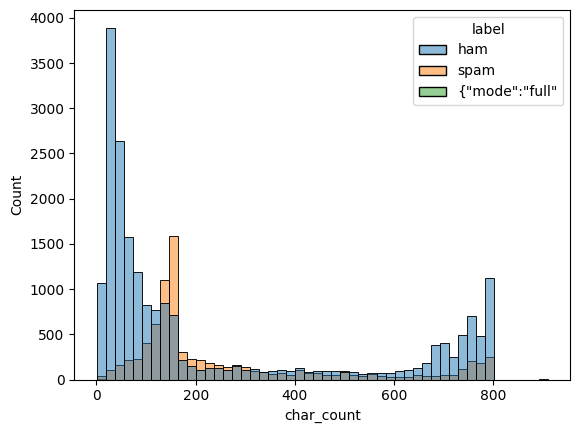

In [ ]:
sns.histplot(data=final_df, x='char_count', hue='label', bins=50)

Word distribution plot:

<Axes: xlabel='word_count', ylabel='Count'>

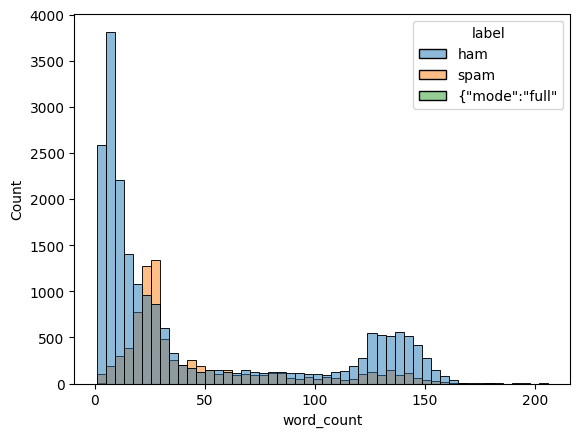

In [ ]:
sns.histplot(data=final_df, x='word_count', hue='label', bins=50)

Most common used words in Spam Messages:

In [ ]:
spam_words = ' '.join(final_df[final_df['label']=='spam']['message']).lower().split()
ham_words = ' '.join(final_df[final_df['label']=='ham']['message']).lower().split()

In [ ]:
Counter(spam_words).most_common(20)

[('to', 9847),
 ('the', 6933),
 ('you', 6068),
 ('and', 5845),
 ('a', 5493),
 ('your', 5237),
 ('of', 4265),
 ('for', 4201),
 ('in', 3455),
 ('i', 3088),
 ('is', 3008),
 ('this', 2503),
 ('on', 2343),
 ('with', 2280),
 ('1635465', 1985),
 ('have', 1833),
 ('we', 1831),
 ('from', 1788),
 ('are', 1776),
 ('free', 1588)]

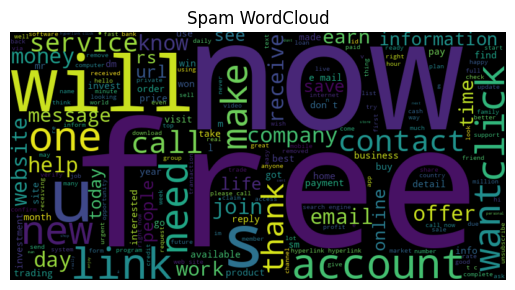

In [ ]:
wordcloud = WordCloud(width=800, height=400).generate(' '.join(spam_words))
plt.title("Spam WordCloud")
plt.imshow(wordcloud.to_array(), interpolation='bilinear')
plt.axis('off')
plt.show()